In [ ]:
!pip install pyvi

In [ ]:
!unzip '/content/drive/MyDrive/KHMT0119/Đồ Án KHMT0119/Đồ Án Tốt Nghiệp/Data DA/CTUET-VNNV_V1.1.2.zip' -d "/content/"

In [ ]:
# Cài đặt các thư viện cần thiết
from pyvi import ViTokenizer, ViUtils
import os
import re
import pandas as pd
import numpy as np
from tqdm import tqdm
import regex
from collections import Counter
import pickle
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import gensim

In [ ]:
stopword = set()
with open('/content/drive/MyDrive/KHMT0119/Đồ Án KHMT0119/Đồ Án Tốt Nghiệp/Data DA/stopword.txt', 'r', encoding='utf-8') as _fp:
    word = _fp.readlines()
stopword = [n.replace('\n', '') for n in word]

def remove_stopwords(line):
    words = []
    for word in line.strip().split():
        if word not in stopword:
            words.append(word)
    return ' '.join(words)

In [ ]:
def remove_html(txt):
    return regex.sub(r'<[^>]*>', '', txt)

In [ ]:
def text_preprocess(document):
    '''
    document: là văn bản cần làm sạch
    '''
    # tách từ
    document = ViTokenizer.tokenize(document)
    # Kiểm tra chính tả
    document = ViUtils.correct_spelling(document)
    # đưa về lower
    document = document.lower()
    # xóa các ký tự không cần thiết
    document = regex.sub(
        r'[^\s\wáàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ_]', ' ', document)
    # xóa khoảng trắng thừa
    document = regex.sub(r'\s+', ' ', document).strip()
    #  Remove các ký tự kéo dài
    document = re.sub(r'([A-Z])\1+', lambda m: m.group(1).upper(), document, flags=re.IGNORECASE)
    # remove nốt những ký tự thừa thãi
    document = document.replace(u'"', u' ')
    document = document.replace(u'️', u'')
    document = document.replace('🏻', '')
    return document

# Get data

In [ ]:
import os
import chardet
from tqdm import tqdm
from gensim.utils import simple_preprocess
from pyvi import ViTokenizer

dir_path = os.path.dirname(os.path.realpath(os.getcwd()))
dir_path = os.path.join(dir_path, 'Data')

def detect_encoding(file_path):
    rawdata = open(file_path, "rb").read()
    result = chardet.detect(rawdata)
    return result['encoding']

def get_data(folder_path):
    X = []
    y = []
    dirs = os.listdir(folder_path)
    for path in dirs:
        file_paths = os.listdir(os.path.join(folder_path, path))
        for file_path in tqdm(file_paths):
            try:
                encoding = detect_encoding(os.path.join(folder_path, path, file_path))
                with open(os.path.join(folder_path, path, file_path), 'r', encoding=encoding) as f:
                    lines = f.readlines()
                    lines = ' '.join(lines)
                    lines = simple_preprocess(lines)
                    lines = ' '.join(lines)
                    lines = ViTokenizer.tokenize(lines)
                    lines = remove_stopwords(lines)
                    X.append(lines)
                    y.append(path)
            except (UnicodeDecodeError, FileNotFoundError):
                print(f"Skipped invalid file: {os.path.join(folder_path, path, file_path)}")
                continue
    return X, y


In [ ]:
# Gọi hàm get_data và truyền thư mục chứa dữ liệu của bạn
X_data, y_labels = get_data("/content/CTUET-VNNV_V1.1.2")

100%|██████████| 1308/1308 [00:10<00:00, 120.23it/s]


In [ ]:
X_data[7000:7001]

['chánh thanh tra bộ tế vừa có quyết định xử phạt vi phạm hành chính đối với công ty cổ phần dược vật tư tế hải dương trụ sở chính tại số phố chi lăng phường nguyễn trãi thành phố hải dương tỉnh hải dương giấy chứng nhận đăng ký doanh nghiệp mã số doanh nghiệp đăng ký lần đầu ngày tháng năm đăng ký thay đổi lần thứ ngày tháng năm tại phòng đăng ký kinh doanh sở kế hoạch đầu tư tỉnh hải dương người đại diện theo pháp luật là bà nguyễn thị tú anh chức danh tổng giám đốc công ty theo đó công ty bị xử phạt triệu đồng do đã vi phạm hành chính không thực hiện lưu giữ mẫu nguyên liệu ban đầu thành phẩm theo quy định hoặc có lưu giữ mẫu nhưng không đủ lượng mẫu và thời gian lưu theo quy định vi phạm quy định tại điểm khoản điều nghị định số ndcp ngày tháng năm của chính phủ sửa đổi bổ sung một số điều của nghị định năm ndcp ngày tháng năm của chính phủ quy định xử phạt vi phạm hành chính về an toàn thực phẩm và nghị định số ndcp ngày tháng năm của chính phủ quy định xử phạt vi phạm hành chính 

In [ ]:
import pickle

# Lưu biến X
with open('X_data_V1.pkl', 'wb') as f:
    pickle.dump(X_data, f)

# Lưu biến y
with open('y_labels_V1.pkl', 'wb') as f:
    pickle.dump(y_labels, f)

In [ ]:
# Đọc biến X
with open('X_data_V1.pkl', 'rb') as f:
    X_data = pickle.load(f)

# Đọc biến y
with open('y_labels_V1.pkl', 'rb') as f:
    y_labels = pickle.load(f)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import csv

# Tạo danh sách dữ liệu cho việc ghi vào tệp CSV
data_to_write = []
for text, label in zip(X_data, y_labels):
    data_to_write.append([text, label])

# Đường dẫn tới tệp CSV mà bạn muốn ghi vào
csv_file_path = "a1.csv"

# Ghi dữ liệu vào tệp CSV
with open(csv_file_path, 'w', newline='', encoding='utf-8') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(["Text", "Label"])  # Viết tên cột
    csv_writer.writerows(data_to_write)     # Viết dữ liệu từ danh sách vào tệp

In [ ]:
df = pd.read_csv('/content/a1.csv')
df

Text             Label
0      cho chị hồng quyên ngày hôm qua tại kiên giang...  Dự báo thời tiết
1      cho chị hồng quyên ngày hôm qua tại kiên giang...  Dự báo thời tiết
2      tiếp tục với các thông tin thời tiết cập nhật ...  Dự báo thời tiết
3      tiếp tục với các thông tin thời tiết cập nhật ...  Dự báo thời tiết
4      bản tin dự báo thời tiết khu vực tây nam bộ và...  Dự báo thời tiết
...                                                  ...               ...
14526  thưa quý vị sáng nay môn thi cuối cùng trong n...           Kinh tế
14527  thưa quý vị sáng nay môn thi cuối cùng trong n...           Kinh tế
14528  ronaldo đứng trước cơ hội giành danh hiệu đầu ...           Kinh tế
14529  ronaldo đứng trước cơ hội giành danh hiệu đầu ...           Kinh tế
14530  viettel tiếp tục khủng hoảng làm khách trên sâ...           Kinh tế

[14531 rows x 2 columns]

In [ ]:
df = df.dropna(subset=['Text'])
df.describe()

Text             Label
count                                               14531             14531
unique                                               7243                11
top     hãy bước vào một chương mới đầy hứng khởi của ...  Chính trị Xã hội
freq                                                    8              1457

In [ ]:
df.to_csv('VNNV_underthesea.csv', index=False)
df = pd.read_csv('/content/VNNV_underthesea.csv')
df

Text             Label
0      cho chị hồng quyên ngày hôm qua tại kiên giang...  Dự báo thời tiết
1      cho chị hồng quyên ngày hôm qua tại kiên giang...  Dự báo thời tiết
2      tiếp tục với các thông tin thời tiết cập nhật ...  Dự báo thời tiết
3      tiếp tục với các thông tin thời tiết cập nhật ...  Dự báo thời tiết
4      bản tin dự báo thời tiết khu vực tây nam bộ và...  Dự báo thời tiết
...                                                  ...               ...
14526  thưa quý vị sáng nay môn thi cuối cùng trong n...           Kinh tế
14527  thưa quý vị sáng nay môn thi cuối cùng trong n...           Kinh tế
14528  ronaldo đứng trước cơ hội giành danh hiệu đầu ...           Kinh tế
14529  ronaldo đứng trước cơ hội giành danh hiệu đầu ...           Kinh tế
14530  viettel tiếp tục khủng hoảng làm khách trên sâ...           Kinh tế

[14531 rows x 2 columns]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

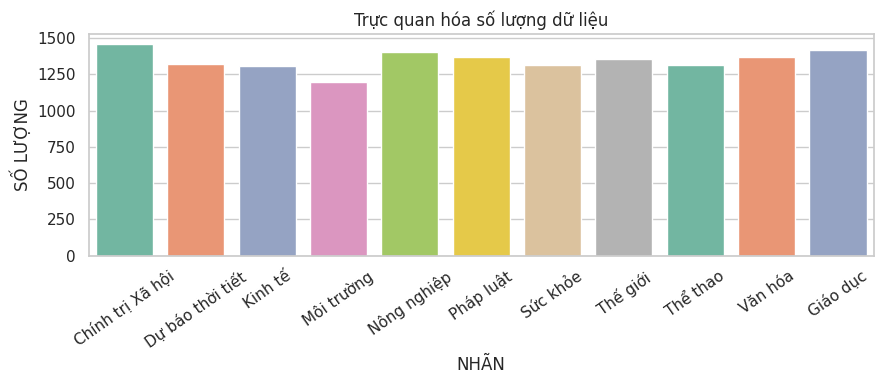

In [ ]:
# Biểu đồ
sns.set(style="whitegrid")
plt.figure(figsize=(9, 4))

# Sử dụng Countplot với dữ liệu từ y_labels và sử dụng order như bạn đã nêu
sns.countplot(x=y_labels, palette="Set2",
              order=['Chính trị Xã hội', 'Dự báo thời tiết', 'Kinh tế',
                     'Môi trường', 'Nông nghiệp', 'Pháp luật', 'Sức khỏe',
                     'Thế giới', 'Thể thao', 'Văn hóa', 'Giáo dục'])

plt.xlabel("NHÃN")
plt.ylabel("SỐ LƯỢNG")
plt.title("Trực quan hóa số lượng dữ liệu")
plt.xticks(rotation=35)  # Để nhãn trục x không bị chồng chéo
plt.tight_layout()       # Để đảm bảo không bị cắt bớt các phần tử
plt.show()

In [ ]:
order=['Chính trị Xã hội', 'Dự báo thời tiết', 'Kinh tế',
                     'Môi trường', 'Nông nghiệp', 'Pháp luật', 'Sức khỏe',
                     'Thế giới', 'Thể thao', 'Văn hóa', 'Giáo dục']

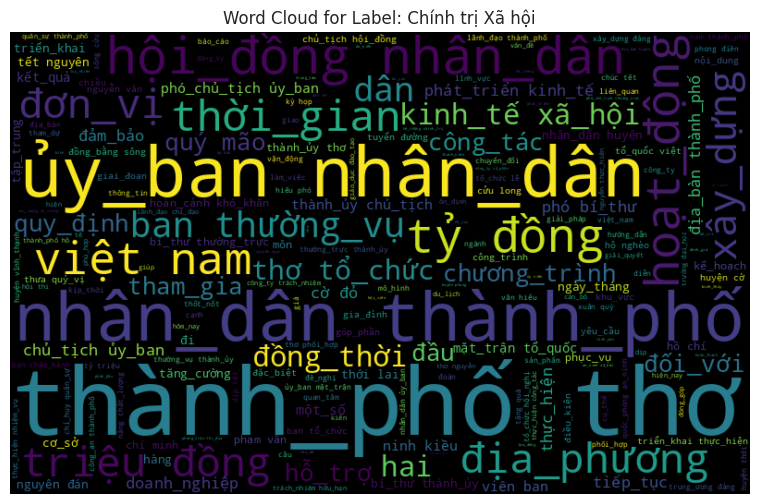

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

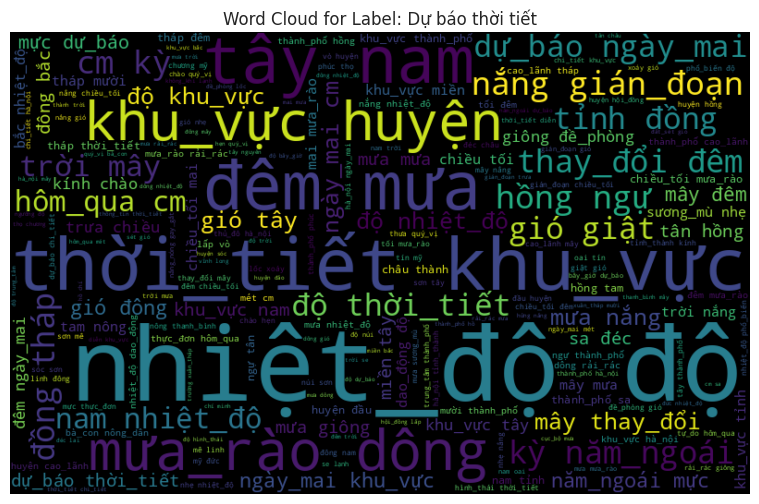

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

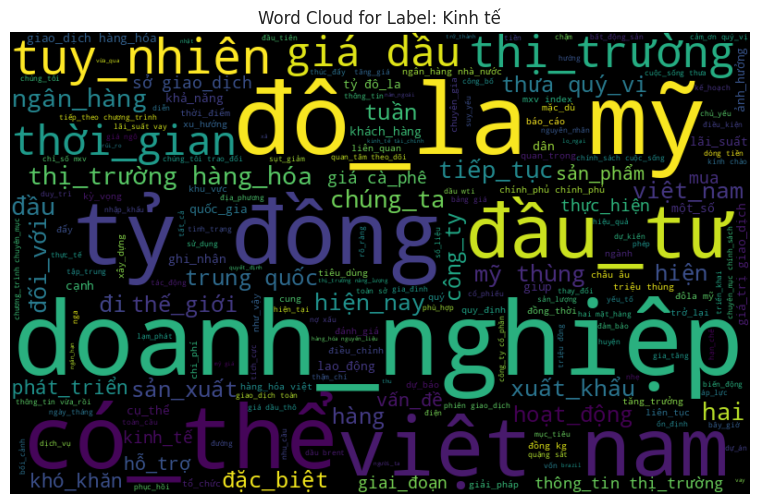

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

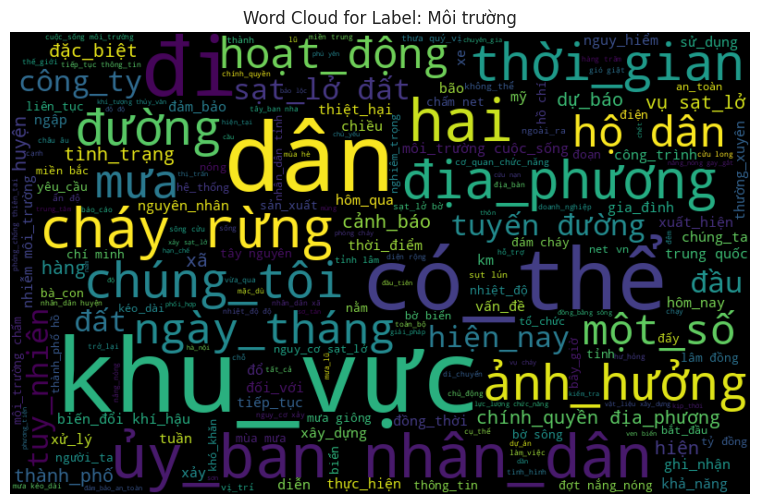

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

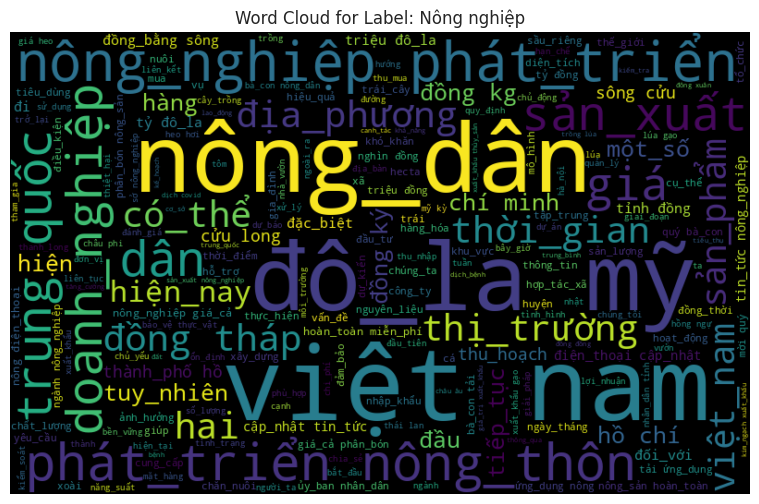

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

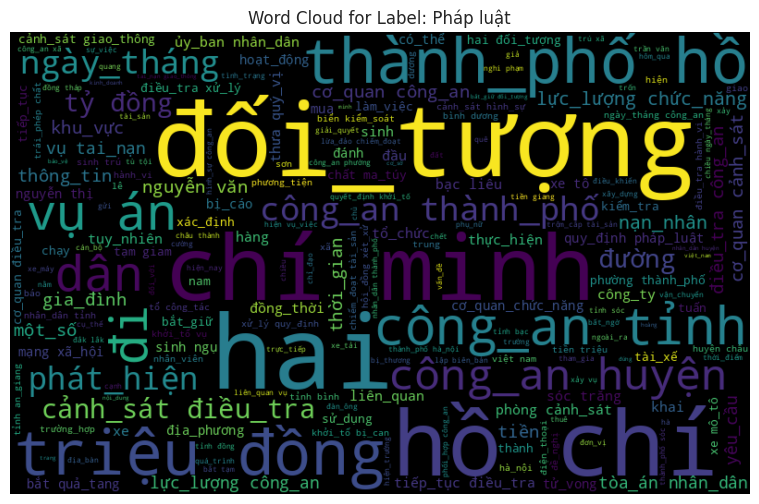

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

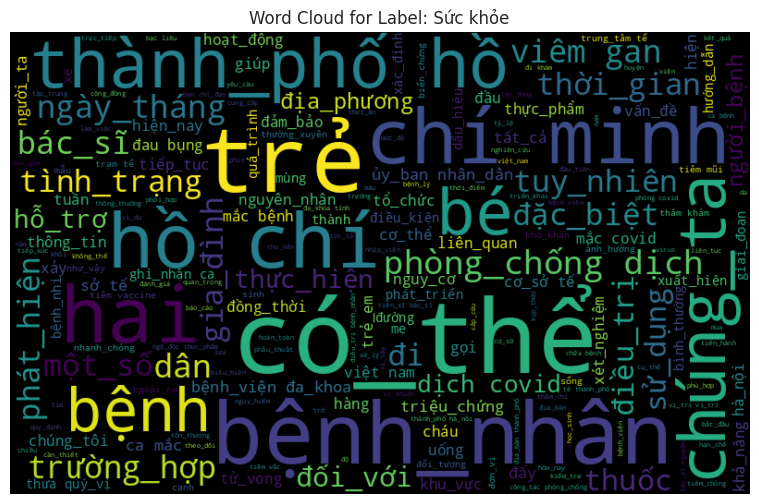

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

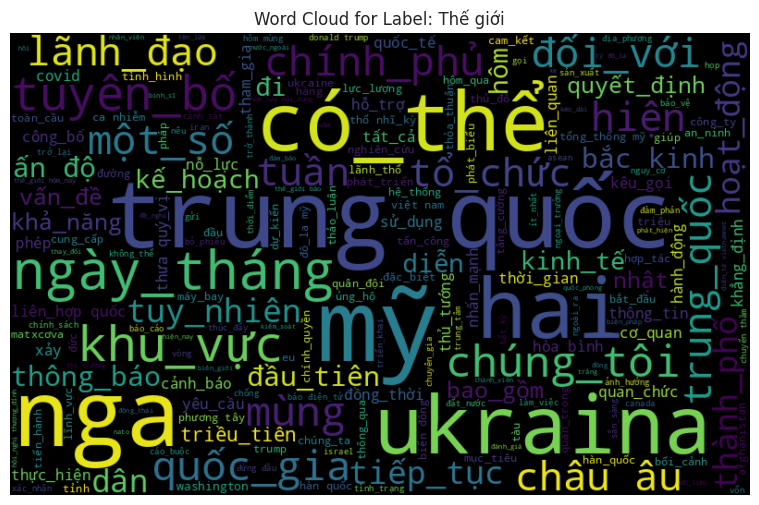

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

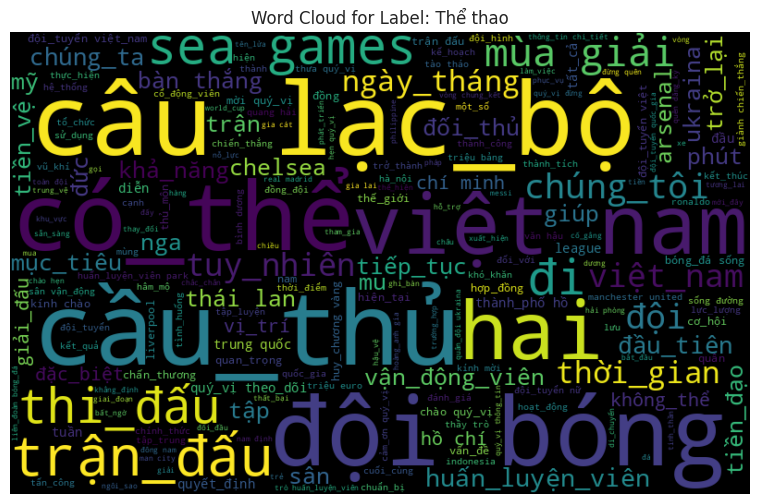

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

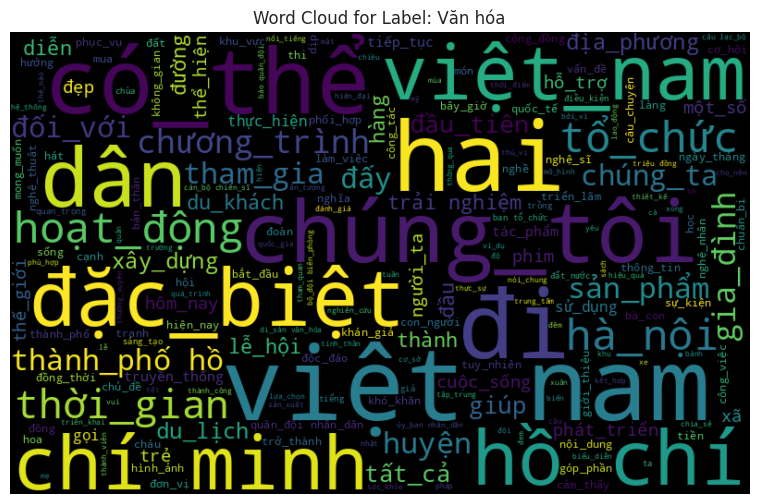

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

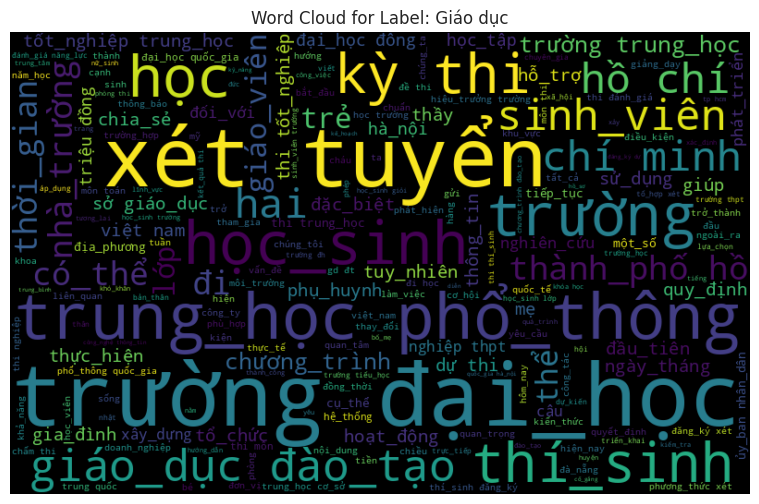

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Tạo một từ điển để lưu trữ các văn bản theo từng nhãn
text_by_label = {}

# Lặp qua từng văn bản và nhãn tương ứng
for text, label in zip(X_data, y_labels):
    if label not in text_by_label:
        text_by_label[label] = ''
    text_by_label[label] += ' ' + text

# Sắp xếp các văn bản theo thứ tự của danh sách order
ordered_texts = [text_by_label[label] for label in order]

# Hiển thị biểu đồ Word Cloud cho từng nhãn theo thứ tự trong danh sách order
for label, text in zip(order, ordered_texts):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"Word Cloud for Label: {label}")
    plt.axis('off')
    plt.show()

    # Hiển thị biểu đồ trong ô mã của Google Colab
    display(plt.gcf())  # plt.gcf(): lấy hình ảnh hiện tại của matplotlib
